In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [3]:
df=pd.read_csv('credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
df.count()


Loan ID                         100000
Customer ID                     100000
Loan Status                     100000
Current Loan Amount             100000
Term                            100000
Credit Score                     80846
Annual Income                    80846
Years in current job             95778
Home Ownership                  100000
Purpose                         100000
Monthly Debt                    100000
Years of Credit History         100000
Months since last delinquent     46859
Number of Open Accounts         100000
Number of Credit Problems       100000
Current Credit Balance          100000
Maximum Open Credit              99998
Bankruptcies                     99796
Tax Liens                        99990
dtype: int64

In [5]:
df.drop(columns=['Loan ID','Customer ID',],axis=1,inplace=True)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
df.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [7]:
df['Loan Status'].value_counts()
df['Term'].value_counts()

Term
Short Term    72208
Long Term     27792
Name: count, dtype: int64

ZMIENNE KATEGORYCZNE

In [8]:
#df['Loan Status']=df['Loan Status'].replace({'Fully Paid':1,'Charged Off':0})

In [9]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [10]:
df['Loan Status'].value_counts()
df['Term'].value_counts()
df['Years in current job'].value_counts()
df['Home Ownership'].value_counts()
df['Purpose'].value_counts()



Purpose
Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: count, dtype: int64

In [11]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


WARTOŚCI PUSTE

In [12]:
df = df.dropna(subset=['Years in current job'])

df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
df = df.dropna(subset=['Bankruptcies'])
df = df.dropna(subset=['Tax Liens'])
df = df.dropna(subset=['Maximum Open Credit'])






df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    18301
Annual Income                   18301
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [13]:
df = pd.get_dummies(data=df, columns=['Term', 'Years in current job', 'Home Ownership', 'Purpose'])


ODSTAJACE

In [14]:
median_value = df['Annual Income'].median() 
df['Annual Income']=df['Annual Income'].fillna(value=median_value)
median_value2 = df['Current Loan Amount'].median() 
df['Current Loan Amount']=df['Current Loan Amount'].fillna(value=median_value2)
median_value3 = df['Credit Score'].median() 
df['Credit Score']=df['Credit Score'].fillna(value=median_value3)
df.isnull().sum()

Loan Status                       0
Current Loan Amount               0
Credit Score                      0
Annual Income                     0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
Term_Long Term                    0
Term_Short Term                   0
Years in current job_1 year       0
Years in current job_10+ years    0
Years in current job_2 years      0
Years in current job_3 years      0
Years in current job_4 years      0
Years in current job_5 years      0
Years in current job_6 years      0
Years in current job_7 years      0
Years in current job_8 years      0
Years in current job_9 years      0
Years in current job_< 1 year     0
Home Ownership_HaveMortgage       0
Home Ownership_Home Mortgage

In [15]:

df['Current Loan Amount']=df['Current Loan Amount'].replace(99999999.0,789250.0)#zastapiane maksimum z tej kolumny
df.loc[df['Credit Score'] > 5000, 'Credit Score'] = 1071.75

In [16]:
import pandas as pd

def outliers_iqr(df, kolumny):  
    
    mask = pd.Series(True, index=df.index)

 
    for kol in kolumny:
       
        Q1 = df[kol].quantile(0.25)
        Q3 = df[kol].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR

      
        column_mask = (df[kol] >= lower_bound) & (df[kol] <= upper_bound)
        
        
        mask &= column_mask

    
    df_clean = df[mask]
    
    return df_clean

df_clean = outliers_iqr(df, ['Annual Income', 'Current Loan Amount', 'Maximum Open Credit'])



In [17]:
df_clean.count()

Loan Status                       90262
Current Loan Amount               90262
Credit Score                      90262
Annual Income                     90262
Monthly Debt                      90262
Years of Credit History           90262
Months since last delinquent      90262
Number of Open Accounts           90262
Number of Credit Problems         90262
Current Credit Balance            90262
Maximum Open Credit               90262
Bankruptcies                      90262
Tax Liens                         90262
Term_Long Term                    90262
Term_Short Term                   90262
Years in current job_1 year       90262
Years in current job_10+ years    90262
Years in current job_2 years      90262
Years in current job_3 years      90262
Years in current job_4 years      90262
Years in current job_5 years      90262
Years in current job_6 years      90262
Years in current job_7 years      90262
Years in current job_8 years      90262
Years in current job_9 years      90262


WIZUALIZACJA PO WYCZYSZCZENIU DANYCH

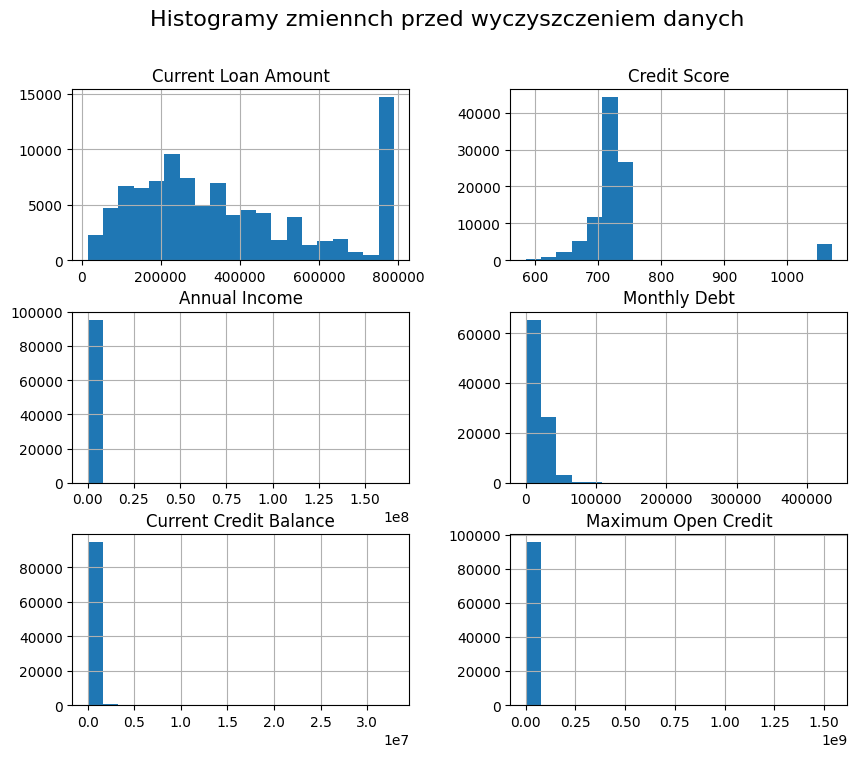

In [18]:
df[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit']].hist(bins=20, figsize=(10, 8))

plt.suptitle('Histogramy zmiennch przed wyczyszczeniem danych', fontsize=16)
plt.show()

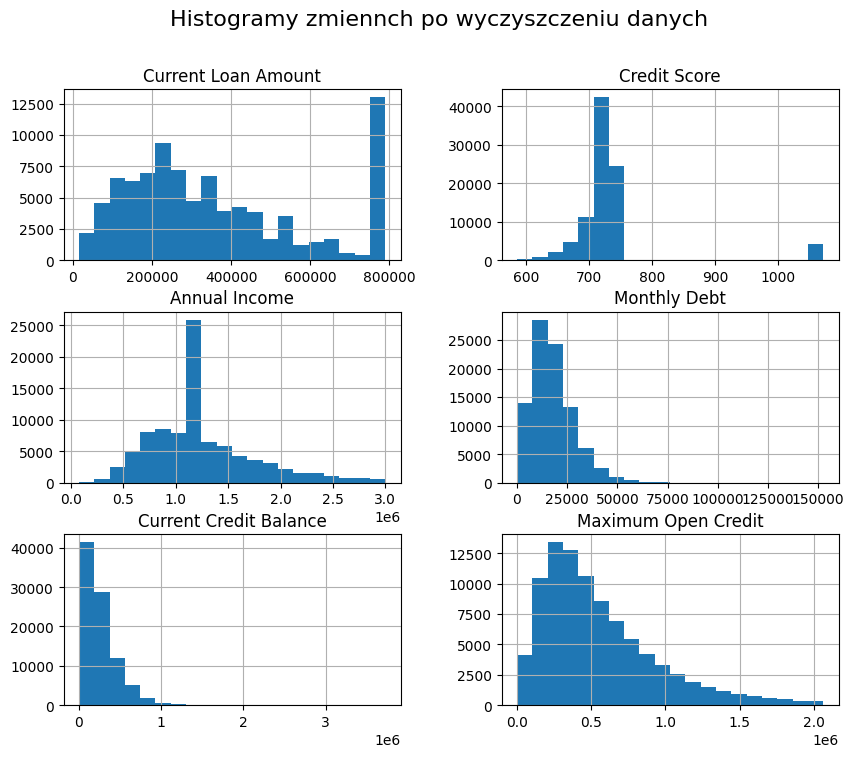

In [19]:
df_clean[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit']].hist(bins=20, figsize=(10, 8))

plt.suptitle('Histogramy zmiennch po wyczyszczeniu danych', fontsize=16)
plt.show()

TESTY NORMALNOSCI

In [20]:


def normality(df, kolumny):
    wynik = []
    for kol in kolumny:
        statystyka, p_value = shapiro(df[kol])  
        wynik.append((kol, statystyka, p_value))  
    return wynik


wynik = normality(df_clean, ['Annual Income', 'Current Loan Amount', 'Credit Score', 'Monthly Debt', 'Number of Open Accounts', 'Maximum Open Credit'])
for kolumna, statystyka, p_value in wynik:
    print(f"Kolumna: {kolumna}, Statystyka: {statystyka:.4f}, P-value: {p_value:.4f}")
    
    
    

        
        

Kolumna: Annual Income, Statystyka: 0.9359, P-value: 0.0000
Kolumna: Current Loan Amount, Statystyka: 0.9017, P-value: 0.0000
Kolumna: Credit Score, Statystyka: 0.4896, P-value: 0.0000
Kolumna: Monthly Debt, Statystyka: 0.9369, P-value: 0.0000
Kolumna: Number of Open Accounts, Statystyka: 0.9390, P-value: 0.0000
Kolumna: Maximum Open Credit, Statystyka: 0.9024, P-value: 0.0000


C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 90262.
  res = hypotest_fun_out(*samples, **kwds)


In [21]:
status_counts = df_clean['Loan Status'].value_counts()

print(status_counts)

Loan Status
Fully Paid     69797
Charged Off    20465
Name: count, dtype: int64


DRZEWO KLASYFIKACYJNE

C:\Users\Marceli\AppData\Local\Temp\ipykernel_33860\1885752116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Loan Status'] = df_clean['Loan Status'].replace({1: 'Fully Payed ', 0: 'Charged off'})


Accuracy: 0.816263224948762


[Text(0.625, 0.875, 'Credit Score <= 911.375\ngini = 0.35\nsamples = 72209\nvalue = [16338.0, 55871.0]\nclass = Fully Payed '),
 Text(0.5, 0.625, 'Current Loan Amount <= 789140.0\ngini = 0.307\nsamples = 68927\nvalue = [13056, 55871]\nclass = Fully Payed '),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'Term_Short Term <= 0.5\ngini = 0.338\nsamples = 60685\nvalue = [13055, 47630]\nclass = Fully Payed '),
 Text(0.125, 0.125, 'gini = 0.407\nsamples = 17242\nvalue = [4908, 12334]\nclass = Fully Payed '),
 Text(0.375, 0.125, 'gini = 0.305\nsamples = 43443\nvalue = [8147, 35296]\nclass = Fully Payed '),
 Text(0.75, 0.375, 'Years in current job_2 years <= 0.5\ngini = 0.0\nsamples = 8242\nvalue = [1, 8241]\nclass = Fully Payed '),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 7399\nvalue = [0, 7399]\nclass = Fully Payed '),
 Text(0.875, 0.125, 'gini = 0.002\nsamples = 843\nvalue = [1, 842]\nclass = Fully Payed '),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 3282\nvalue = [3282, 0]\nclass = Fu

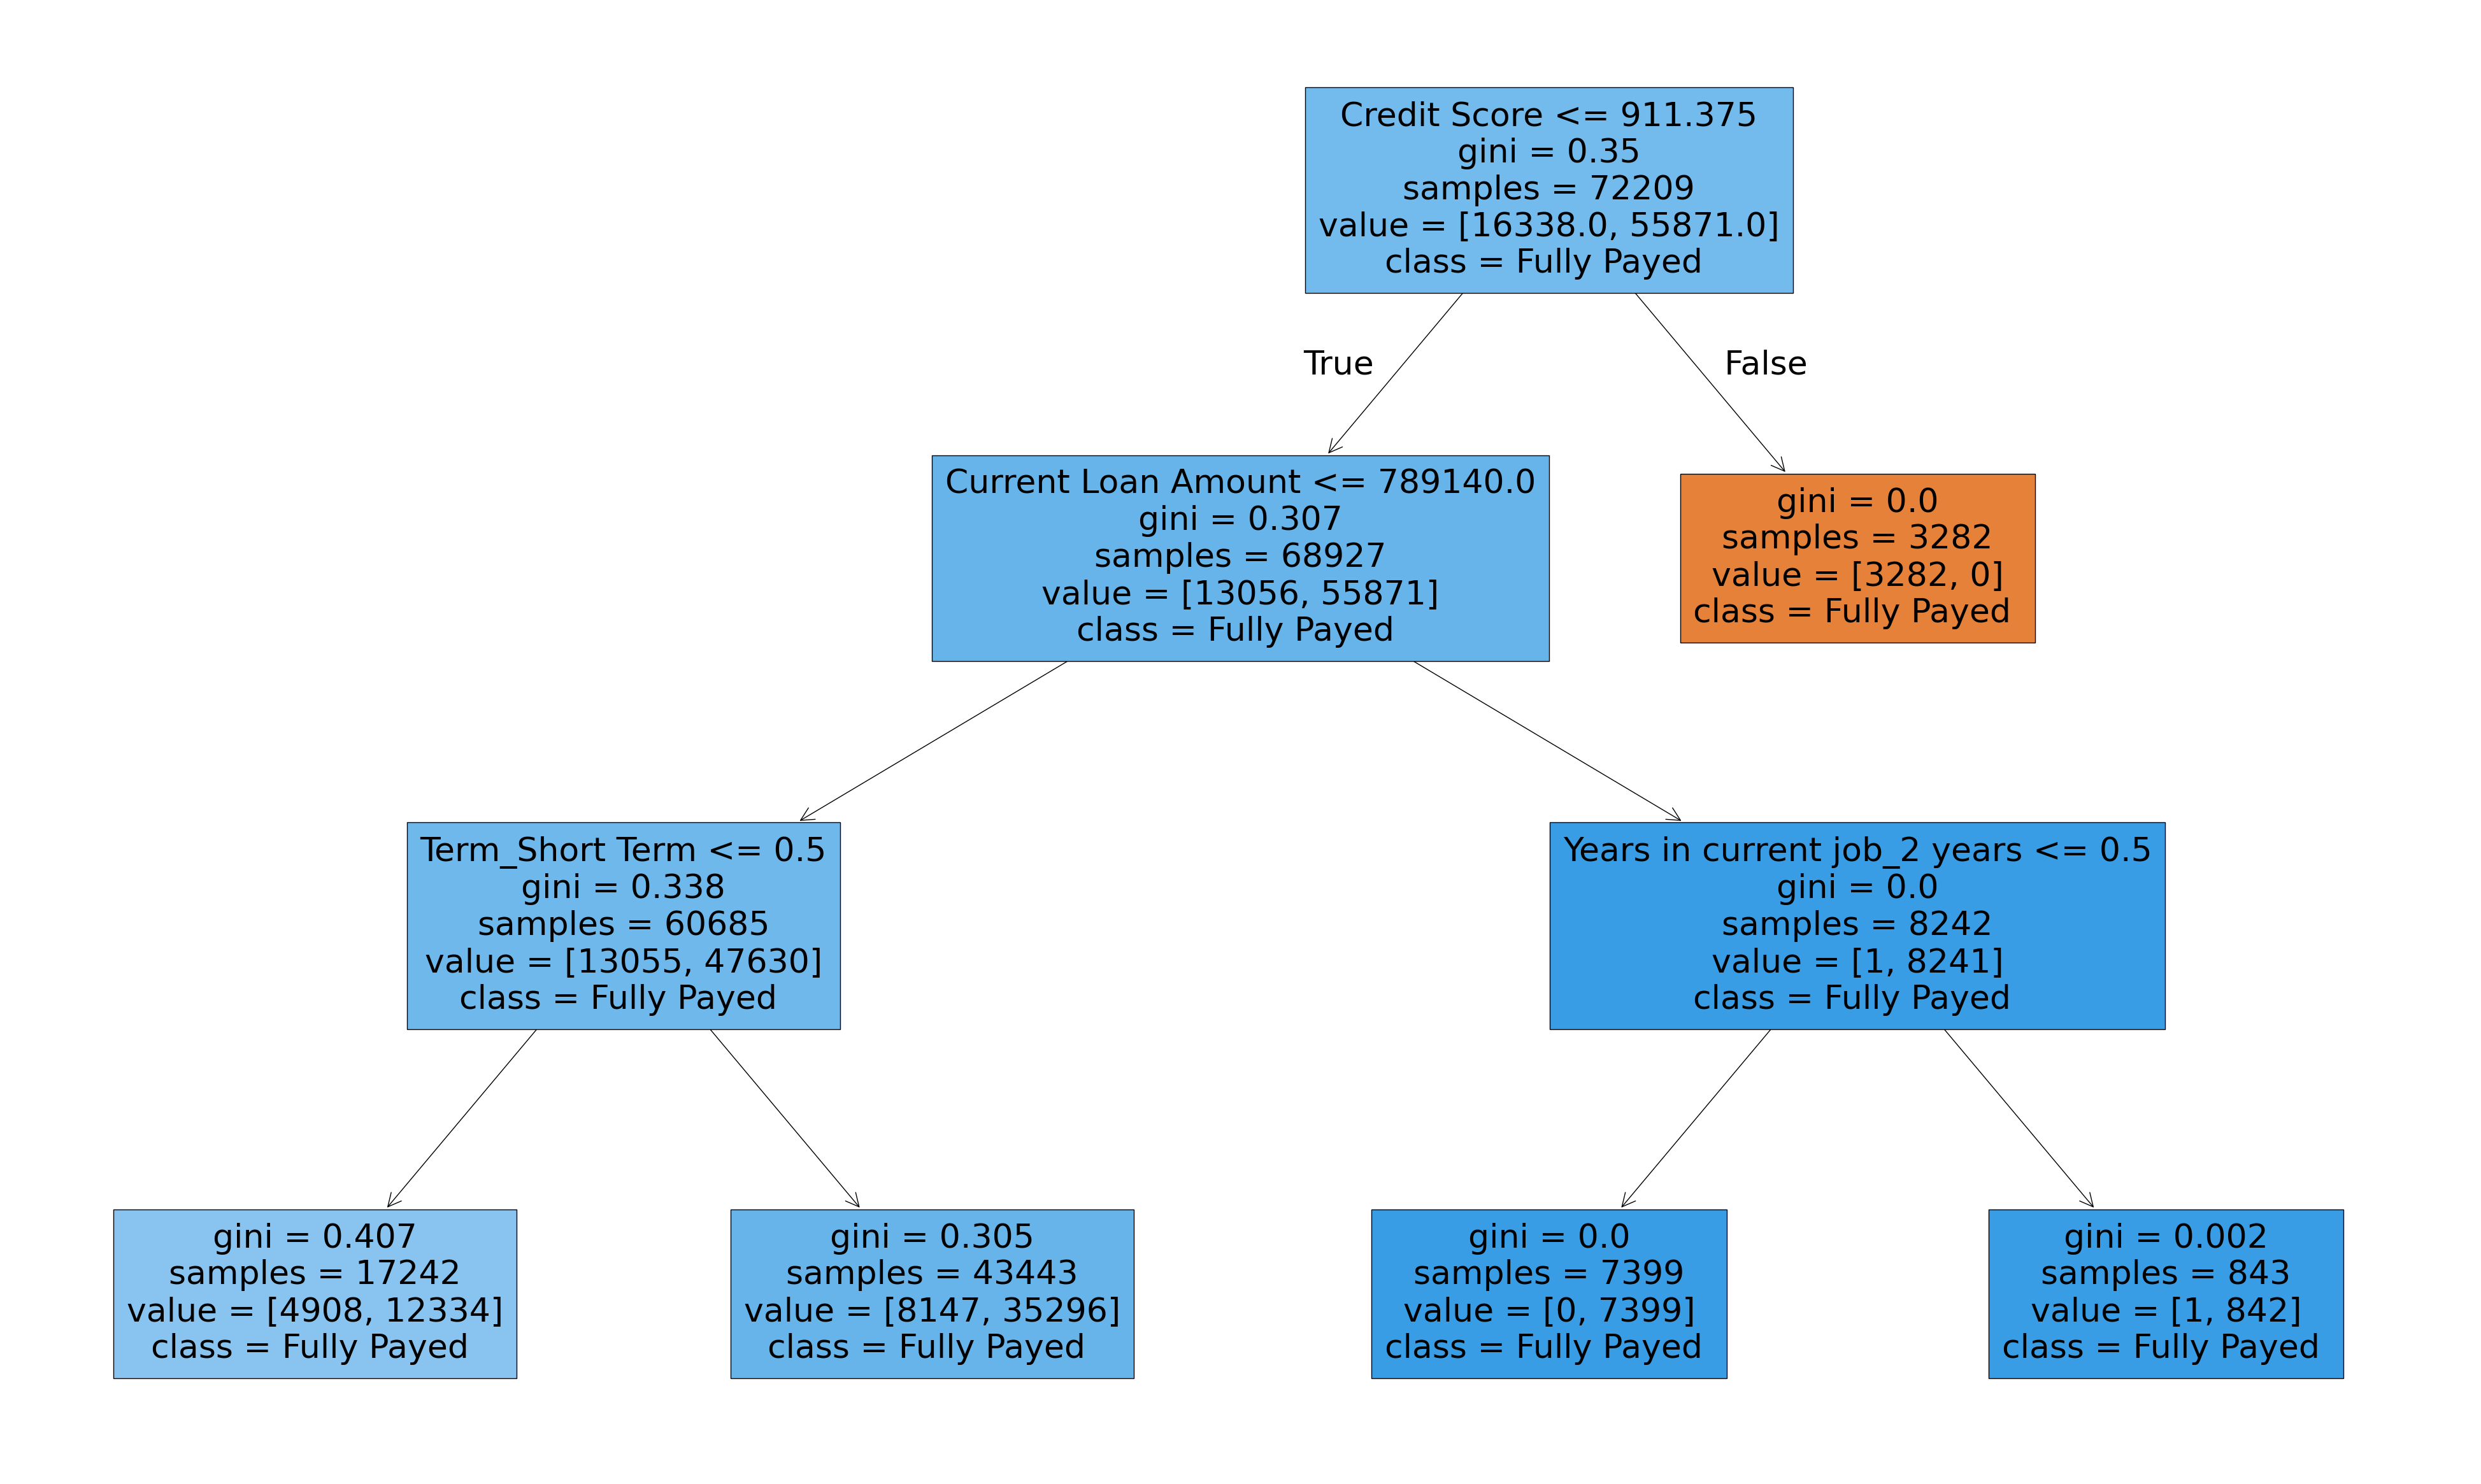

In [36]:

df_clean['Loan Status'] = df_clean['Loan Status'].replace({1: 'Fully Payed ', 0: 'Charged off'})
X = df_clean.drop(columns=['Loan Status'])  
y = df_clean['Loan Status'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualize Decision Tree
plt.figure(figsize=(50, 30))
tree.plot_tree(clf,feature_names=X.columns,class_names=y,filled=True)


RANDOM FOREST

Random Forest Accuracy: 0.8163


Text(0.5, 1.0, 'Feature Importance')

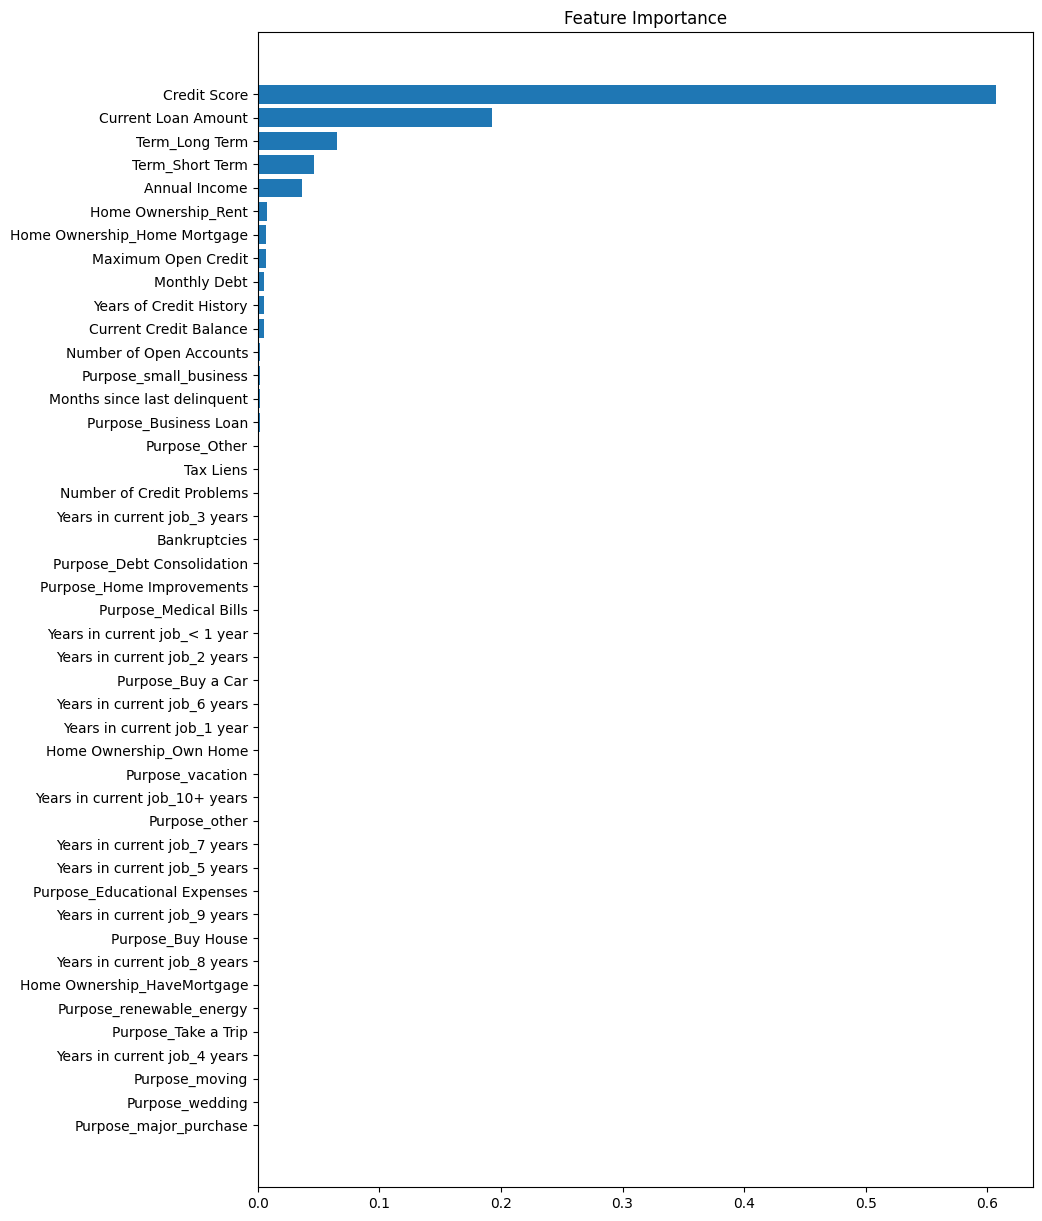

In [38]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.4f}')

feature_importance = rf.feature_importances_

sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


Regresja za pomocą lasow losowych

XGBOOST

In [24]:
df_clean['Loan Status'] = df_clean['Loan Status'].replace({"Charged Off": 0, "Fully Paid": 1})

X = df_clean.drop(columns=['Loan Status'])
y = df_clean['Loan Status']

X.columns = X.columns.astype(str)  # Convert column names to strings
X.columns = X.columns.str.replace(r"[\[\]<>]", "", regex=True)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)
# Define the parameters for the XGBoost classifier
param = {
    'eta': 0.3,
    'max_depth': 8,
    'objective': 'multi:softprob',
    'num_class': 2}

steps = 21  # The number of training iterations

# Train the model
model = xgb.train(param, D_train, steps)

# Predict the labels of the test set
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

# Print the accuracy of the classifier
print(f"Accuracy: {accuracy_score(y_test, best_preds)}")



C:\Users\Marceli\AppData\Local\Temp\ipykernel_33860\2939276551.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Loan Status'] = df_clean['Loan Status'].replace({"Charged Off": 0, "Fully Paid": 1})
C:\Users\Marceli\AppData\Local\Temp\ipykernel_33860\2939276551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Loan Status'] = df_clean['Loan Status'].replace({"Charged Off": 0, "Fully Paid": 1})


Accuracy: 0.8182573533484739


KNN

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)





Accuracy: 0.7772669362432837


KNN z najlepsza optymalna wartoscia k

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8119980058716003


Walidacja krzyzowa i wybor optymalnego k

In [27]:
# k_values = [i for i in range (1,31)]
# scores = []

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     score = cross_val_score(knn, X, y, cv=5)
#     scores.append(np.mean(score))



# sns.lineplot(x = k_values, y = scores, marker = 'o')
# plt.xlabel("K Values")
# plt.ylabel("Accuracy Score")



# best_index = np.argmax(scores)
# best_k = k_values[best_index]

# knn = KNeighborsClassifier(n_neighbors=best_k)
# knn.fit(X_train, y_train)



# y_pred = knn.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, pos_label=1)
# recall = recall_score(y_test, y_pred, pos_label=1)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Najlepsza wartość k:", best_k)

In [28]:
# Accuracy: 0.8119980058716003
# Precision: 0.8054170049878204
# Recall: 0.9971994829814735
# Najlepsza wartość k: 29

REGRESJA LOGISTYCZNA

GRID

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for Logistic Regression
}

# Initialize GridSearchCV with Logistic Regression
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearch to training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the corresponding score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score}") 

Best Hyperparameters: {'C': 0.01, 'solver': 'saga'}
Best Cross-validation Accuracy: 0.81880375277115


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Replace Loan Status values
df_clean['Loan Status'] = df_clean['Loan Status'].replace({"Charged Off": 0, "Fully Paid": 1})

# Features and target
X = df_clean.drop(columns=['Loan Status'])
y = df_clean['Loan Status']

# Clean up column names
X.columns = X.columns.astype(str)
X.columns = X.columns.str.replace(r"[\[\]<>]", "", regex=True)

# Scale your features if not already done
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Use best parameters found from GridSearchCV
logreg = LogisticRegression(C=0.01, solver='saga', max_iter=10000)  # increased max_iter for convergence

# Fit the model
logreg.fit(X_train, y_train)

# Make predictions
prediction = logreg.predict(X_test)

# Evaluate with classification report
print(classification_report(y_test, prediction, digits=5))

C:\Users\Marceli\AppData\Local\Temp\ipykernel_33860\449950583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Loan Status'] = df_clean['Loan Status'].replace({"Charged Off": 0, "Fully Paid": 1})


              precision    recall  f1-score   support

           0    0.96243   0.21280   0.34854      4093
           1    0.81211   0.99756   0.89533     13960

    accuracy                        0.81964     18053
   macro avg    0.88727   0.60518   0.62194     18053
weighted avg    0.84619   0.81964   0.77136     18053



In [31]:
df_clean.to_csv('credit_train_clean.csv', index=False)

KLASYFIKACJA OBSERWACJI Z POZA RAMKI DANYCH

In [32]:

np.random.seed(42)

sample = pd.DataFrame([{
    'Loan Status': np.random.choice(['Fully Paid', 'Charged Off']),
    'Current Loan Amount': np.random.randint(1000, 40000),
    'Term': np.random.choice(['Short Term', 'Long Term']),
    'Credit Score': np.random.choice([720, 680, 640, 600]),
    'Annual Income': round(np.random.uniform(25000, 150000), 2),
    'Years in current job': np.random.choice(['< 1 year', '1 year', '2 years', '3 years', '5 years', '10+ years']),
    'Home Ownership': np.random.choice(['Rent', 'Own Home', 'Home Mortgage']),
    'Purpose': np.random.choice(['Debt Consolidation', 'Home Improvements', 'Business Loan', 'Buy a Car']),
    'Monthly Debt': round(np.random.uniform(500, 3000), 2),
    'Years of Credit History': round(np.random.uniform(1, 25), 1),
    'Months since last delinquent': np.random.randint(1, 61),
    'Number of Open Accounts': np.random.randint(1, 15),
    'Number of Credit Problems': np.random.randint(0, 4),
    'Current Credit Balance': np.random.randint(0, 40000),
    'Maximum Open Credit': np.random.randint(1000, 50000),
    'Bankruptcies': np.random.choice([0, 1, 2], p=[0.85, 0.1, 0.05]),
    'Tax Liens': np.random.choice([0, 1, 2], p=[0.9, 0.08, 0.02])
}])

sample = pd.get_dummies(data=sample, columns=['Term', 'Years in current job', 'Home Ownership', 'Purpose'])
print(sample.T)

                                       0
Loan Status                   Fully Paid
Current Loan Amount                16795
Credit Score                         640
Annual Income                  116499.24
Monthly Debt                     1614.58
Years of Credit History              3.4
Months since last delinquent          11
Number of Open Accounts                8
Number of Credit Problems              0
Current Credit Balance             16023
Maximum Open Credit                42090
Bankruptcies                           0
Tax Liens                              1
Term_Short Term                     True
Years in current job_5 years        True
Home Ownership_Rent                 True
Purpose_Business Loan               True


In [33]:
X = sample.drop(columns=['Loan Status'])  
y = sample['Loan Status'] 


#Drzewa decyzyjne
clf = DecisionTreeClassifier(max_depth=5,random_state=42)
clf.fit(X,y)
y_pred1 = clf.predict(X)
print(f"Predicted Loan Status in Decision Tree Classificator: {y_pred1[0]}")


#Las losowy 
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X, y)
y_pred2 = rf.predict(X)
print(f"Predicted Loan Status in RandomForest: {y_pred2[0]}")


#KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_scaled, y)
y_pred3 = knn.predict(X_scaled)
print(f"Predicted Loan Status in KNN Classificator: {y_pred3[0]}")


Predicted Loan Status in Decision Tree Classificator: Fully Paid
Predicted Loan Status in RandomForest: Fully Paid
Predicted Loan Status in KNN Classificator: Fully Paid
